In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models, similarities
import numpy as np
import ast

In [6]:
df_results = pd.read_csv('datasets/similarity_results.csv')

In [7]:
df_results.head()

,Unnamed: 0,snippet_id,groundtruth_label,lda10.0_100,lda10.0_150,lda10.0_200,lda10.0_250,lda10.0_300,lda15.0_100,lda15.0_150,...,rp30.0_100,rp30.0_150,rp30.0_200,rp30.0_250,rp30.0_300,rp35.0_100,rp35.0_150,rp35.0_200,rp35.0_250,rp35.0_300
0,0,887759,True,0.285848,0.150756,0.150756,0.123255,0.150756,0.150756,0.150756,...,0.123374,0.064873,0.092946,0.156921,0.062799,-0.087840,0.182770,0.232634,0.143797,0.067072
1,1,887760,False,0.301832,0.333396,0.150892,0.246197,0.166667,0.151062,0.166667,...,0.268887,0.066216,0.164322,0.184827,0.101672,0.125676,0.108861,0.112844,0.142874,0.153927
2,2,887761,False,0.597814,0.353493,0.353553,0.515437,0.353553,0.371142,0.353553,...,0.363186,0.281096,0.333333,0.382620,0.374325,0.312014,0.281078,0.329099,0.339873,0.307556
3,3,887762,False,0.570920,0.377889,0.377964,0.462910,0.377964,0.377921,0.377964,...,0.248637,0.314014,0.261959,0.321958,0.337382,0.257044,0.426982,0.266202,0.193260,0.272530
4,4,887763,False,0.474045,0.500095,0.250000,0.407977,0.500000,0.250057,0.500000,...,0.146863,0.066922,0.032225,0.138952,0.221387,0.258433,0.092907,0.156520,0.148639,0.027455


In [3]:
df_results.columns

Index(['Unnamed: 0', 'snippet_id', 'groundtruth_label', 'bow10.0', 'bow15.0',
       'bow20.0', 'bow25.0', 'bow30.0', 'bow35.0', 'tfidf10.0', 'tfidf15.0',
       'tfidf20.0', 'tfidf25.0', 'tfidf30.0', 'tfidf35.0'],
      dtype='object')

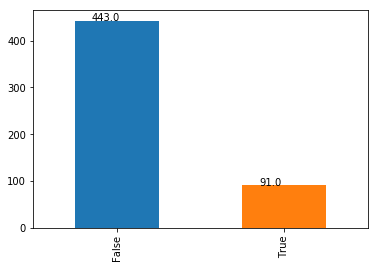

In [4]:
ax = df_results['groundtruth_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()*1000)/1000), (p.get_x() +0.1, p.get_height() +0.02))


In [5]:
models = {'bow':[],'tfidf':[]}
thresholds = {'bow':[],'tfidf':[]}
#nb_topics = np.arange(100,350,50)
for model in models:
    for nb_word in sorted(list(np.arange(10000,40000,5000)),reverse=True):
        """
        for nb_topic in nb_topics:
            df_ = df_results[['groundtruth_label',model+str(nb_word/1000)+'_'+str(nb_topic)]]\
            .sort_values(by=[model+str(nb_word/1000)+'_'+str(nb_topic)],ascending=False)
            labels_ = list(df_['groundtruth_label'].as_matrix())
            sims_ = list(df_[model+str(nb_word/1000)+'_'+str(nb_topic)].as_matrix())
            count = 0
            threshold_up = 1
            threshold_down = 1
            first = True
            for i in range(0,len(labels_)):
                if labels_[i]==True:
                    count+=1
                    threshold_up = sims_[i]
                    first = False
                else:
                    if not first:
                        threshold_down = sims_[i]
                    break
            models[model].append(count)
            thresholds[model].append(threshold_up)
            thresholds[model].append(threshold_down)
        """
        df_ = df_results[['groundtruth_label',model+str(nb_word/1000)]]\
        .sort_values(by=[model+str(nb_word/1000)],ascending=False)
        labels_ = list(df_['groundtruth_label'].as_matrix())
        sims_ = list(df_[model+str(nb_word/1000)].as_matrix())
        count = 0
        threshold_up = 1
        threshold_down = 1
        first = True
        for i in range(0,len(labels_)):
            if labels_[i]==True:
                count+=1
                threshold_up = sims_[i]
                first = False
            else:
                if not first:
                    threshold_down = sims_[i]
                break
        models[model].append(count)
        thresholds[model].append(threshold_up)
        thresholds[model].append(threshold_down)

In [6]:
tuples_models = []
tuples_thresholds = []
for nb_word in sorted(list(np.arange(10000,40000,5000)),reverse=True):
        tuples_models.append(nb_word)
        tuples_thresholds.append((nb_word,'up'))
        tuples_thresholds.append((nb_word,'down'))
        #for nb_topic in nb_topics:
        #    tuples_models.append((nb_word,nb_topic))
        #    tuples_thresholds.append((nb_word,nb_topic,'up'))
        #   tuples_thresholds.append((nb_word,nb_topic,'down'))
            
#index_models = pd.MultiIndex.from_tuples(tuples_models, names=['nb_word', 'nb_topic'])
index_models = tuples_models
index_thresholds = pd.MultiIndex.from_tuples(tuples_thresholds, names=['nb_word','limit'])

In [7]:
df_counts = pd.DataFrame(models, index=index_models).unstack()
print(df_counts[['bow','tfidf']])

bow    35000    2
       30000    2
       25000    2
       20000    2
       15000    3
       10000    4
tfidf  35000    1
       30000    1
       25000    1
       20000    1
       15000    1
       10000    1
dtype: int64


In [26]:
df_thresholds = pd.DataFrame(thresholds, index=index_thresholds).unstack()
print(df_thresholds[['lsi','lda','rp']])

                       lsi                 lda                  rp          
limit                 down        up      down        up      down        up
nb_word nb_topic                                                            
10000   100       1.000000  1.000000  1.000000  1.000000  0.582609  0.595641
        150       0.992971  0.994423  0.632245  0.635650  0.657423  0.659160
        200       0.989488  0.992548  0.686809  0.707051  0.567839  0.580800
        250       1.000000  1.000000  0.701447  0.714567  0.657330  0.665934
        300       1.000000  1.000000  0.612366  0.617384  0.543964  0.546821
15000   100       0.994970  0.995182  1.000000  1.000000  0.668166  0.721183
        150       0.991550  0.993851  0.651641  0.699216  0.612734  0.620176
        200       0.988567  0.990910  0.615213  0.616698  0.578780  0.589279
        250       0.980830  0.985199  0.589166  0.592875  0.602594  0.642790
        300       1.000000  1.000000  0.644925  0.668818  0.520648  0.542851

In [27]:
df_thresholds_2 = pd.DataFrame({'lsi': (df_thresholds['lsi']['up'] - df_thresholds['lsi']['down']).apply(lambda x: int(100*x)/100),
                                'lda': (df_thresholds['lda']['up'] - df_thresholds['lda']['down']).apply(lambda x: int(100*x)/100), 
                                'rp': (df_thresholds['rp']['up'] - df_thresholds['rp']['down']).apply(lambda x: int(100*x)/100)},
                              index = df_thresholds.index)

df_thresholds_2[['lsi','lda','rp']].unstack()

lsi                       lda                            rp        \
nb_topic  100  150  200  250  300   100   150   200   250   300   100   150   
nb_word                                                                       
10000     0.0  0.0  0.0  0.0  0.0  0.00  0.00  0.02  0.01  0.00  0.01  0.00   
15000     0.0  0.0  0.0  0.0  0.0  0.00  0.04  0.00  0.00  0.02  0.05  0.00   
20000     0.0  0.0  0.0  0.0  0.0  0.00  0.01  0.04  0.04  0.06  0.06  0.01   
25000     0.0  0.0  0.0  0.0  0.0  0.00  0.00  0.01  0.02  0.01  0.00  0.02   
30000     0.0  0.0  0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  0.01  0.02   
35000     0.0  0.0  0.0  0.0  0.0  0.02  0.04  0.02  0.00  0.06  0.05  0.07   

                            
nb_topic   200   250   300  
nb_word                     
10000     0.01  0.00  0.00  
15000     0.01  0.04  0.02  
20000     0.18  0.02  0.00  
25000     0.04  0.00  0.01  
30000     0.01  0.13  0.03  
35000     0.00  0.00  0.20

0.6477783620357513


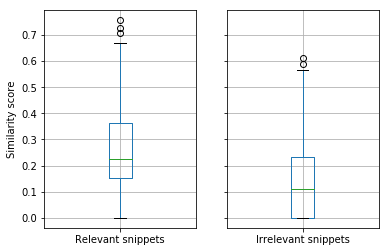

In [35]:
fig, axs = plt.subplots(1,2, sharey = True)
ax = df_results[df_results['groundtruth_label']==True][['lda30.0_200']].boxplot(ax=axs[0])
ax.set_xticklabels(['Relevant snippets'])
ax.set_ylabel('Similarity score')
print(df_results[df_results['groundtruth_label']==True]['lda30.0_200'].quantile(0.95))
ax = df_results[df_results['groundtruth_label']==False][['lda30.0_200']].boxplot(ax=axs[1])
ax.set_xticklabels(['Irrelevant snippets'])

plt.savefig('05_similarity_scores_snippets.png')

In [49]:
df_results[df_results['lda30.0_200']>=0.5][['lda30.0_200','groundtruth_label']].sort_values(by=['lda30.0_200'], ascending=False)

,lda30.0_200,groundtruth_label
82,0.755929,True
178,0.724375,True
407,0.707106,True
202,0.668730,True
416,0.655590,True
203,0.639966,True
387,0.617469,True
101,0.612372,False
440,0.588554,False
140,0.566809,False
